In [1]:
#get setences from setnences.txt
sentences = []
with open('sentences.txt', 'r') as f:
    for line in f:
        sentences.append(line.strip())

for sentence in sentences:
    print(sentence)

Astronomy is my favourite acticity, I enjoy looking at stars, planets and the Solar System.
My telescope is able to see the flag on the moon, as well as other planets in the Solar System.
I can not believe, England drew to America in the Football World Cup.
Football is an 11 vs 11 game played with a round ball.
University students hate early mornings.
I am in my 3rd year of study at the University of Warwick.
Computer Science is a bad degree.
It's quite bad that I can't think of another sentence.
My Computer has 87% charge.
My favourite fast food is McDonalds.
The big brain move is to buy 5 99p hamburgers instead of a normal burger from McDonalds.
Rugby is strictly better than Football.
Why is League of Legends a terrible game?
Counter Strike Global Offensive is my most played game.
I prefer ARAM to normal league.
I used to play Rugby in a league of 8 teams.
The weather is rather pleasent today.
It rained all of yesterday. Why does British weather suck.
A Monad is a Monoid in the categ

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text

sentences = [clean_text(sentence) for sentence in sentences]
for sentence in sentences:
    print(sentence)

astronomy favourite acticity enjoy looking stars planets solar system
telescope able see flag moon well planets solar system
believe england drew america football world cup
football 11 vs 11 game played round ball
university students hate early mornings
3rd year study university warwick
computer science bad degree
quite bad cant think another sentence
computer 87 charge
favourite fast food mcdonalds
big brain move buy 5 99p hamburgers instead normal burger mcdonalds
rugby strictly better football
league legends terrible game
counter strike global offensive played game
prefer aram normal league
used play rugby league 8 teams
weather rather pleasent today
rained yesterday british weather suck
monad monoid category endofunctors
functional programming really cool dont really understand monad
favourite programming language python
really interesting writing compiler programming language
python interpreted language
cpp compiled language meaning use compiler turn code lowlevel code
university 

In [3]:
from concepts import Context

# get all unique words from sentences
words = []
for sentence in sentences:
    words += sentence.split()
words = list(set(words))

sentence_numbers = list(map(lambda x : "Sentence "+ str(x), range(1, len(sentences)+1)))

# create bools matrix
matrix = []
for sentence in sentences:
    row = []
    for word in words:
        if word in sentence:
            row.append(True)
        else:
            row.append(False)
    matrix.append(row)

# create context
c = Context(objects=sentence_numbers, properties=words, bools=matrix)


In [22]:
import random
#get random int from 0 to len(sentences)
test_sentence = random.randint(0, len(sentences)-1)
print(sentence_numbers[test_sentence], " : ", sentences[test_sentence])
test_sentence2 = random.randint(0, len(sentences)-1)
print(sentence_numbers[test_sentence2], " : ", sentences[test_sentence2])

print(c.intension([sentence_numbers[test_sentence], sentence_numbers[test_sentence2]]))

Sentence 1  :  astronomy favourite acticity enjoy looking stars planets solar system
Sentence 21  :  favourite programming language python
('favourite',)


In [27]:
test_word = random.randint(0, len(words)-1)
print(words[test_word])
print(c.extension([words[test_word]]))


language
('Sentence 21', 'Sentence 22', 'Sentence 23', 'Sentence 24')


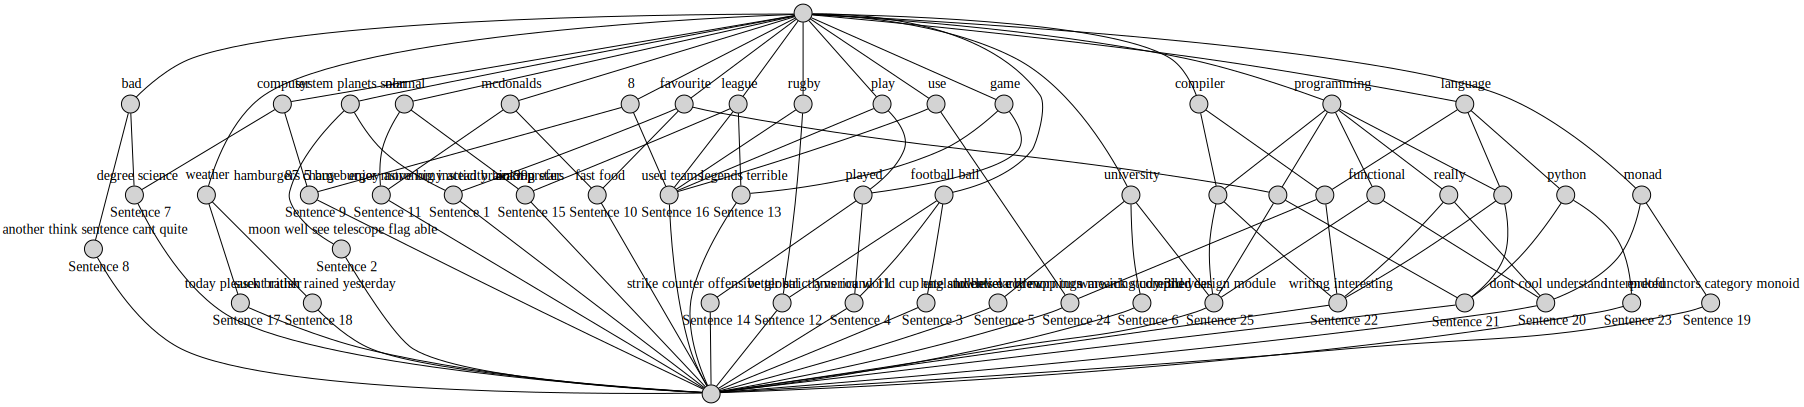

In [28]:
c.lattice.graphviz()

In [29]:
#filter bools matrix
#import deepcopy
from copy import deepcopy
import numpy as np

matrix_c = deepcopy(matrix)
matrix_c = np.array(matrix_c)
matrix_c2 = deepcopy(matrix)
matrix_c2 = np.array(matrix_c2)

words_c = deepcopy(words)
new_sentences = sentence_numbers.copy()

new_words = []
new_matrix = [[] for i in range(len(matrix_c))]

while matrix_c.shape[1] > 0 and matrix_c.shape[0] > 0:
    column = np.argmax(matrix_c.sum(axis=0))

    print(column)

    #get word
    new_words.append(words_c[column])
    words_c.remove(words_c[column])

    for i in range(len(matrix)):
        new_matrix[i].append(matrix_c2[i][column])

    #get rows where column is True
    rows = np.where(matrix_c[:,column] == True)[0]

    #remove rows where column is True
    matrix_c = matrix_c[np.where(matrix_c[:,column] == False)]

    #remove column
    matrix_c = np.delete(matrix_c, column, 1)
    matrix_c2 = np.delete(matrix_c2, column, 1)

    #remove sentences
    rows = sorted(rows, reverse=True)
    for row in rows:
        new_sentences.remove(new_sentences[row])

    

print(len(new_matrix), len(new_matrix[0]))

    


55
5
71
9
27
36
74
86
99
7
8
9
25 12


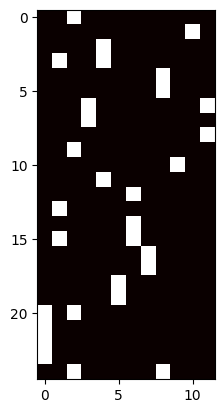

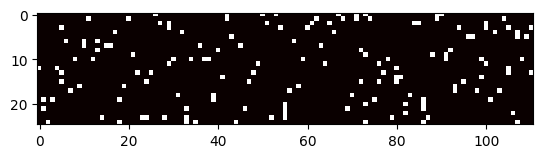

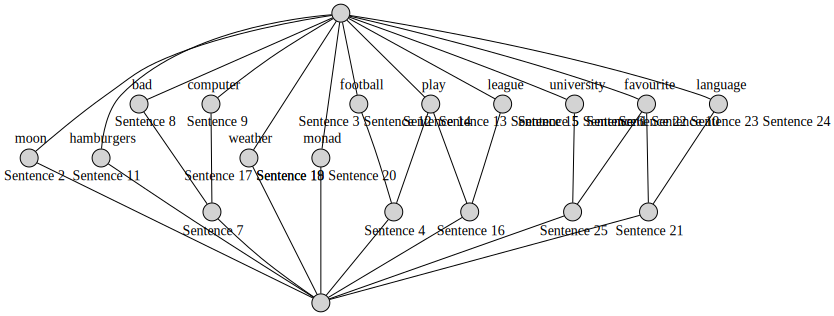

In [30]:
import matplotlib.pyplot as plt

#plot matrix
plt.imshow(new_matrix, cmap='hot', interpolation='nearest')
plt.show()

plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()

c = Context(objects=sentence_numbers, properties=new_words, bools=new_matrix)
c.lattice.graphviz(view=True)

In [33]:
print(sentence_numbers[3], ":" , sentences[3])
# print(sentence_numbers[2], ":" , sentences[2])
print(sentence_numbers[15], ":" , sentences[15])
print(sentence_numbers[13], ":" , sentences[13])
c.intension([sentence_numbers[3], sentence_numbers[13], sentence_numbers[15]])

Sentence 4 : football 11 vs 11 game played round ball
Sentence 16 : used play rugby league 8 teams
Sentence 14 : counter strike global offensive played game


('play',)